<h1 style="text-align: center;">MCQ Creator App</h1>

## Table of Contents
* #### Install & Import Dependencies
* #### Load Documents
* #### Transformer Documents
* #### Generate Text Embeddings
* #### Vector store - PINECONE
* #### Retrieve Answers
* #### Structure the Output

![mcq_langchain.PNG](mcq_langchain.PNG)

## Install Libraries

In [8]:
#Please install the package as per your requirement :)
#!pip install openai==1.14.2
#!pip install langchain==0.1.13
#!pip install unstructured==0.12.3
#!pip install tiktoken==0.5.2
#%pip install pinecone-client==3.2.0
#%pip install pypdf==4.1.0
#%pip install sentence-transformers==2.5.1

   ---------------------------------------- 0.0/156.5 kB ? eta -:--:--
   ------- ------------------------------- 30.7/156.5 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 156.5/156.5 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Import Dependencies

In [3]:
import openai

import pinecone
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone #this below has been replaced by the below import
from langchain_community.vectorstores import Pinecone #Importing Pinecone class, specifically using the alias PineconeStore for convenience.
#from langchain.llms import OpenAI  #this below has been replaced by the below import
from langchain_openai import OpenAI
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings

<font color='green'>
The code sets environment variables for accessing OpenAI API and Hugging Face Hub API using respective API keys<font>

In [4]:
import os
os.environ["OPENAI_API_KEY"] = "sk-xxxxxxxxxxxxxxxxxxxxxxxxxx"
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "hf_xxxxxxxxxxxxxxxxxxxxxxxxxx"

## Load Documents

<font color='green'>
Loads PDF files available in a directory with pypdf<font>

In [5]:
#Function to read documents
def load_docs(directory):
  loader = PyPDFDirectoryLoader(directory)
  documents = loader.load()
  return documents

In [9]:
# Passing the directory to the 'load_docs' function
directory = 'Docs/'
documents = load_docs(directory)
len(documents)

3

In [6]:
documents

[Document(page_content="India, officially known as the Republic of India, is a diverse and vibrant country located in South\nAsia. With a rich history spanning thousands of years, India is known for its cultural heritage, \nreligious diversity, and vast landscapes. From the majestic Himalayas in the north to the serene\nbackwaters of Kerala in the south, India encompasses a wide range of geographical features, \nincluding deserts, plains, mountains, and coastlines, making it a land of incredible natural \nbeauty.\nIndia is the seventh-largest country by land area and the second-most populous country in the \nworld, with a population exceeding 1.3 billion people. It is a federal parliamentary democratic \nrepublic, with a president as the head of state and a prime minister as the head of government. \nThe country follows a multi-tiered administrative structure, with 28 states and 9 union territories,\neach having its own elected government.\nIndia has a rich cultural heritage that has e

## Transform Documents

<font color='green'>
Split document Into Smaller Chunks<font>

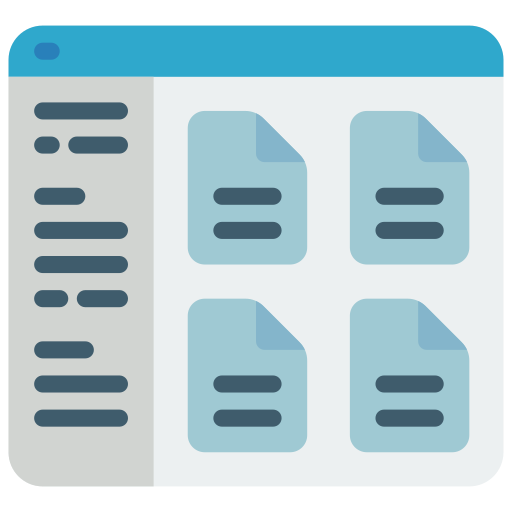

In [10]:
#This function will split the documents into chunks
def split_docs(documents, chunk_size=1000, chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

In [11]:
docs = split_docs(documents)
print(len(docs))

7


## Generate Text Embeddings

<font color='green'>
OpenAI LLM for creating Embeddings for documents/Text<font>

In [9]:
#embeddings = OpenAIEmbeddings(model_name="ada")

<font color='green'>
Hugging Face LLM for creating Embeddings for documents/Text<font>

In [12]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\janio\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\janio\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<font color='green'>
Let's test our Embeddings model for a sample text<font>

In [13]:
query_result = embeddings.embed_query("Hello Buddy")
len(query_result)

384

In [14]:
query_result

[-0.06978834420442581,
 0.054206255823373795,
 0.07814785093069077,
 0.03390122205018997,
 0.02494748868048191,
 -0.09673736989498138,
 0.05952312797307968,
 0.058978136628866196,
 -0.017896734178066254,
 -0.02317892573773861,
 -0.019000204280018806,
 0.0005968579207547009,
 0.02466609515249729,
 -0.07030831277370453,
 -0.007522599305957556,
 0.010224461555480957,
 -0.011180879548192024,
 -0.02124854549765587,
 -0.03859453275799751,
 0.026550395414233208,
 -0.06505239754915237,
 0.0650002509355545,
 0.009431764483451843,
 -0.06271227449178696,
 -0.023625459522008896,
 -0.030638113617897034,
 0.059961192309856415,
 0.07367487996816635,
 -0.032867785543203354,
 -0.02606102079153061,
 -0.006967121735215187,
 0.030617903918027878,
 0.059396665543317795,
 0.001471983385272324,
 0.012021688744425774,
 0.028293680399656296,
 -0.059225257486104965,
 -0.07919750362634659,
 0.048963695764541626,
 0.02309003658592701,
 0.055362775921821594,
 -0.026251336559653282,
 -0.01732114888727665,
 0.005511

## Vector store - PINECONE

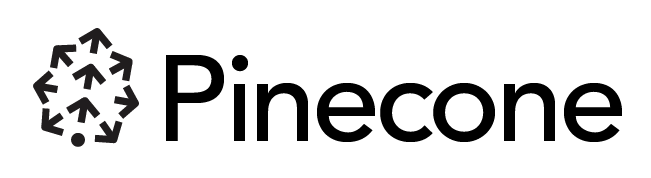

<font color='green'>
Pinecone allows for data to be uploaded into a vector database and true semantic search can be performed.<br><br> Not only is conversational data highly unstructured, but it can also be complex. Vector search and vector databases allows for similarity searches.<font>

<font color='green'>
We will initialize Pinecone and create a Pinecone index by passing our documents, embeddings model and mentioning the specific INDEX which has to be used
    
Vector databases are designed to handle the unique structure of vector embeddings, which are dense vectors of numbers that represent text. They are used in machine learning to capture the meaning of words and map their semantic meaning. <br><br>These databases index vectors for easy search and retrieval by comparing values and finding those that are most similar to one another, making them ideal for natural language processing and AI-driven applications.
    <font>

In [24]:
# Due to recent changes from Pinecone team, there are some minor changes we have to implement, as a part of this we Initialize the Pinecone client

#Please update your pinecone-client package version >=3.0.1
from pinecone import Pinecone as PineconeClient #Importing the Pinecone class from the pinecone package
from langchain_community.vectorstores import Pinecone


# Set your Pinecone API key
# Recent changes by langchain team, expects ""PINECONE_API_KEY" environment variable for Pinecone usage! So we are creating it here
# we are setting the environment variable "PINECONE_API_KEY" to the value and in the next step retrieving it :)
os.environ["PINECONE_API_KEY"] = "xxxxxxxxxxxxxxxxxxxxxxxxxx"
PINECONE_API_KEY=os.getenv("‘PINECONE_API_KEY’")

# Initialize the Pinecone client
PineconeClient(api_key=PINECONE_API_KEY, environment="gcp-starter")
index_name="mcqcreator"
index = Pinecone.from_documents(docs, embeddings, index_name=index_name)


## Retrieve Answers

In [25]:
#This function will help us in fetching the top relevent documents from our vector store - Pinecone
def get_similiar_docs(query, k=2):
    similar_docs = index.similarity_search(query, k=k)
    return similar_docs

<font color='green'>
'load_qa_chain' Loads a chain that you can use to do QA over a set of documents.<br>
    And we will be using Huggingface for the reasoning purpose
<font

In [26]:
from langchain.chains.question_answering import load_qa_chain

#from langchain.llms import HuggingFaceHub
#The above have been updated recently, so going forward we have to use the below :)

from langchain.llms import HuggingFaceEndpoint

<font color='green'>
BigScience Large Open-science Open-access Multilingual Language Model (BLOOM) is a transformer-based large language model.<br> <br>It was created by over 1000 AI researchers to provide a free large language model for everyone who wants to try. Trained on around 366 billion tokens over March through July 2022, it is considered an alternative to OpenAI's GPT-3 with its 176 billion parameters.
<font>

In [16]:
#The earlier mentioned 'HuggingFaceHub' class has been depreciated, so please use the below class'HuggingFaceEndpoint' 
#and the below mentioned model outperforms most of the available open source LLMs

#llm = HuggingFaceEndpoint(repo_id="mistralai/Mistral-7B-Instruct-v0.2") # Model link : https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2
#llm

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\User\.cache\huggingface\token
Login successful


In [27]:
llm = OpenAI()

<font color='green'>
Different Types Of Chain_Type:<br><br>
"map_reduce": It divides the texts into batches, processes each batch separately with the question, and combines the answers to provide the final answer.<br>
"refine": It divides the texts into batches and refines the answer by sequentially processing each batch with the previous answer.<br>
"map-rerank": It divides the texts into batches, evaluates the quality of each answer from LLM, and selects the highest-scoring answers from the batches to generate the final answer. These alternatives help handle token limitations and improve the effectiveness of the question-answering process.
<font

In [28]:
chain = load_qa_chain(llm, chain_type="stuff")

In [29]:
#This function will help us get the answer to the question that we raise
def get_answer(query):
  relevant_docs = get_similiar_docs(query)
  print(relevant_docs)
  response = chain.run(input_documents=relevant_docs, question=query)
  return response

<font color='green'>
Let's pass our question to the above created function
<font

In [30]:
our_query = "How is India's economy?"
answer = get_answer(our_query)
print(answer)

[Document(page_content='However, India also faces various socio-economic challenges. Poverty, income inequality, and \nunemployment are persistent issues that the country strives to address. Efforts are being made\nto improve education, healthcare, infrastructure, and social welfare programs to uplift \nmarginalized sections of society.\nEducation plays a vital role in India, with a strong emphasis on academic excellence. The \ncountry has a vast network of schools, colleges, and universities, producing a large number of \ngraduates every year. Indian professionals have made significant contributions in various fields \nglobally, particularly in science, technology, engineering, and mathematics (STEM).\nThe Indian film industry, popularly known as Bollywood, is a global phenomenon, producing the\nlargest number of films annually. Indian cinema reflects the diversity and cultural richness of \nthe country and has a massive following both within India and among the Indian diaspora \nworl

c:\Users\janio\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 India's economy is one of the fastest-growing in the world, transitioning from an agrarian economy to a service-oriented and industrialized economy. The country is known for its software and information technology services, pharmaceuticals, textiles, agriculture, and manufacturing sectors.


## Structure the Output

In [31]:
import re
import json

In [32]:
from langchain.chat_models import ChatOpenAI #this below has been replaced by the below import
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema

In [33]:
response_schemas = [
    ResponseSchema(name="question", description="Question generated from provided input text data."),
    ResponseSchema(name="choices", description="Available options for a multiple-choice question in comma separated."),
    ResponseSchema(name="answer", description="Correct answer for the asked question.")
]

output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
output_parser

StructuredOutputParser(response_schemas=[ResponseSchema(name='question', description='Question generated from provided input text data.', type='string'), ResponseSchema(name='choices', description='Available options for a multiple-choice question in comma separated.', type='string'), ResponseSchema(name='answer', description='Correct answer for the asked question.', type='string')])

In [34]:
# This helps us fetch the instructions the langchain creates to fetch the response in desired format
format_instructions = output_parser.get_format_instructions()
 
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"question": string  // Question generated from provided input text data.
	"choices": string  // Available options for a multiple-choice question in comma separated.
	"answer": string  // Correct answer for the asked question.
}
```


In [35]:
# create ChatGPT object
chat_model = ChatOpenAI()

In [36]:
chat_model

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x0000013A087F77D0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x0000013A087D9E50>, openai_api_key=SecretStr('**********'), openai_proxy='')

<font color='green'>
The below snippet will give out a string that contains instructions for how the response should be formatted, and we then insert that into our prompt.
<font>

In [37]:
prompt = ChatPromptTemplate(
    messages=[
        HumanMessagePromptTemplate.from_template("""When a text input is given by the user, please generate multiple choice questions 
        from it along with the correct answer. 
        \n{format_instructions}\n{user_prompt}""")  
    ],
    input_variables=["user_prompt"],
    partial_variables={"format_instructions": format_instructions}
)

In [38]:
final_query = prompt.format_prompt(user_prompt = answer)
print(final_query)

messages=[HumanMessage(content='When a text input is given by the user, please generate multiple choice questions \n        from it along with the correct answer. \n        \nThe output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":\n\n```json\n{\n\t"question": string  // Question generated from provided input text data.\n\t"choices": string  // Available options for a multiple-choice question in comma separated.\n\t"answer": string  // Correct answer for the asked question.\n}\n```\n India\'s economy is one of the fastest-growing in the world, transitioning from an agrarian economy to a service-oriented and industrialized economy. The country is known for its software and information technology services, pharmaceuticals, textiles, agriculture, and manufacturing sectors.')]


In [39]:
final_query.to_messages()

[HumanMessage(content='When a text input is given by the user, please generate multiple choice questions \n        from it along with the correct answer. \n        \nThe output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":\n\n```json\n{\n\t"question": string  // Question generated from provided input text data.\n\t"choices": string  // Available options for a multiple-choice question in comma separated.\n\t"answer": string  // Correct answer for the asked question.\n}\n```\n India\'s economy is one of the fastest-growing in the world, transitioning from an agrarian economy to a service-oriented and industrialized economy. The country is known for its software and information technology services, pharmaceuticals, textiles, agriculture, and manufacturing sectors.')]

In [40]:
final_query_output = chat_model.invoke(final_query.to_messages())
print(final_query_output.content)

```json
{
	"question": "What is India known for in terms of its economy?",
	"choices": "Software and information technology services, Pharmaceuticals, Textiles, Agriculture, Manufacturing sectors",
	"answer": "Software and information technology services, Pharmaceuticals, Textiles, Agriculture, Manufacturing sectors"
}
```


<font color='green'>
While working with scenarios like above where we have to process multi-line strings(separated by newline characters – ‘\n’). In such situations, we use re.DOTALL.
<font>

In [41]:
# Let's extract JSON data from Markdown text that we have
markdown_text = final_query_output.content
json_string = re.search(r'{(.*?)}', markdown_text, re.DOTALL).group(1)

In [42]:
print(json_string)


	"question": "What is India known for in terms of its economy?",
	"choices": "Software and information technology services, Pharmaceuticals, Textiles, Agriculture, Manufacturing sectors",
	"answer": "Software and information technology services, Pharmaceuticals, Textiles, Agriculture, Manufacturing sectors"

